#Import Required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, LSTM
from tensorflow.keras.regularizers import l1
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score,make_scorer,roc_auc_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")
import os
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from imblearn.over_sampling import ADASYN

ModuleNotFoundError: No module named 'lightgbm'

#Data PreProcessing

In [5]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,...,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000
mean,33976.974835,-0.241622,-0.018321,0.683462,0.169473,-0.268578,0.101759,-0.114429,0.057624,0.030096,...,-0.028557,-0.106489,-0.038823,0.005627,0.136606,0.020725,0.002811,0.003520,96.628136,0.002506
std,14222.001116,1.857614,1.649726,1.418358,1.377279,1.385175,1.305232,1.251274,1.230082,1.167011,...,0.738014,0.639314,0.608941,0.596550,0.439152,0.497668,0.382484,0.322323,269.895189,0.049999
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,28238.000000,-1.001783,-0.590074,0.195636,-0.724684,-0.887468,-0.636482,-0.604414,-0.141812,-0.666519,...,-0.226694,-0.526921,-0.179448,-0.325986,-0.127251,-0.329217,-0.062635,-0.005865,7.680000,0.000000
50%,37354.000000,-0.241551,0.072585,0.772156,0.188286,-0.301379,-0.149794,-0.074146,0.066101,-0.063081,...,-0.061471,-0.081004,-0.051721,0.061460,0.174488,-0.075903,0.009512,0.022750,26.310000,0.000000
75%,44551.000000,1.153782,0.728136,1.405294,1.053095,0.269637,0.494996,0.420850,0.343556,0.688096,...,0.115486,0.309548,0.078955,0.403106,0.422752,0.297957,0.082538,0.075882,88.500000,0.000000
max,52534.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [ ]:
miss = df.isnull().sum()
miss_percnt = (miss/len(df))*100
pd.concat([miss,miss_percnt], axis=1, keys=['Missing Values','Missing Percentage'])

,Missing Values,Missing Percentage
Time,0,0.000000
V1,0,0.000000
V2,0,0.000000
V3,0,0.000000
V4,0,0.000000
V5,0,0.000000
V6,0,0.000000
V7,0,0.000000
V8,0,0.000000
V9,0,0.000000


In [ ]:
df.dropna(axis=0, inplace = True)

In [ ]:
miss = df.isnull().sum()
miss_percnt = (miss/len(df))*100
pd.concat([miss,miss_percnt], axis=1, keys=['Missing Values','Missing Percentage'])

In [ ]:
print('There are 492 frauds and the rest are genuine transactions in the dataset. \n1 represents fraud and 0 represents  Genuine')
df['Class'].value_counts()

There are 492 frauds and the rest are genuine transactions in the dataset. 
1 represents fraud and 0 represents  Genuine


Class
0.0    67264
1.0      169
Name: count, dtype: int64

In [ ]:
# configure plotly for colab in browser

# def configure_plotly_browser_state():
#   import IPython
#   display(IPython.core.display.HTML('''
#         <script src="/static/components/requirejs/require.js"></script>
#         <script>
#           requirejs.config({
#             paths: {
#               base: '/static/base',
#               plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
#             },
#           });
#         </script>
#         '''))

In [ ]:
fraud = df[(df['Class'] != 0)]
normal = df[(df['Class'] == 0)]

In [ ]:
trace = go.Pie(labels = ['Normal', 'Fraud'], values = df['Class'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'],
                           line=dict(color='#000000', width=1.5)))

layout = dict(title =  'Distribution of normal and fraud tansactions')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)
# fig = go.Figure(data = trace, layout=layout)
# fig.show()
# configure_plotly_browser_state()

In [ ]:
timedelta = pd.to_timedelta(df['Time'], unit='s')

In [ ]:
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
67429,52531,-0.668025,0.539737,0.161731,-1.071380,1.529141,3.819435,-0.685869,1.486179,-0.293208,...,0.070720,1.022712,-0.505535,0.253658,0.017185,0.105271,49.97,0.0,35,14
67430,52532,-0.679169,1.237672,1.602476,-0.007797,-0.228123,-1.095514,0.734340,-0.106748,-0.298766,...,0.020122,0.702798,-0.170477,0.054315,0.380961,0.183103,7.13,0.0,35,14
67431,52532,-0.102663,0.890146,1.178701,-0.062896,0.289073,-0.377077,0.753827,0.035692,-0.936965,...,0.275655,0.190260,-0.804461,-0.240939,0.028038,0.029944,9.50,0.0,35,14
67432,52532,0.797464,-0.947293,1.045822,0.263474,-1.194980,0.348919,-0.594826,0.268371,0.870239,...,-0.023972,0.313647,-0.045046,0.924183,-0.049685,0.031583,170.82,0.0,35,14
67433,52534,1.210560,0.291028,0.273319,0.646091,-0.199608,-0.606096,0.000425,-0.056976,0.051479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,14


In [ ]:
class_0 = df.loc[df['Class'] == 0]["Time_min"]
class_1 = df.loc[df['Class'] == 1]["Time_min"]

In [ ]:
class_0.value_counts()

Time_min
2     1613
0     1458
1     1361
31    1353
3     1314
4     1273
17    1270
18    1248
15    1226
11    1216
21    1212
6     1204
19    1188
25    1183
22    1183
8     1180
30    1173
12    1172
9     1172
7     1166
10    1158
20    1157
23    1147
5     1147
16    1132
14    1131
24    1120
32    1116
33    1113
34    1111
26    1107
51    1101
27    1096
35    1094
48    1084
13    1078
28    1069
45    1063
29    1053
40    1052
41    1048
50    1042
57    1040
44    1028
55    1017
42    1013
46    1013
54    1011
52    1008
56    1007
53     996
38     990
43     987
59     980
58     979
36     977
37     966
49     965
47     959
39     944
Name: count, dtype: int64

In [ ]:
hist_data = [class_0, class_1]

In [ ]:
group_labels = ['Not Fraud', 'Fraud']

In [ ]:
colors = ['#333F44', '#37AA9C', '#94F3E4']

In [ ]:
type(hist_data)

list

In [ ]:
group_labels

['Not Fraud', 'Fraud']

In [ ]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False, colors=colors)
fig['layout'].update(title='Credit Card Transactions Time/Hour Density Plot', xaxis=dict(title='Time [Hr]'))
py.iplot(fig, filename='dist_only_Hr')

In [ ]:
class_0 = df.loc[df['Class'] == 0]["Time_min"]
class_1 = df.loc[df['Class'] == 1]["Time_min"]

In [ ]:
hist_data = [class_0, class_1]

In [ ]:
group_labels = ['Not Fraud', 'Fraud']

In [ ]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time/Hour Density Plot', xaxis=dict(title='Time [Min]'))
py.iplot(fig, filename='dist_only_min')

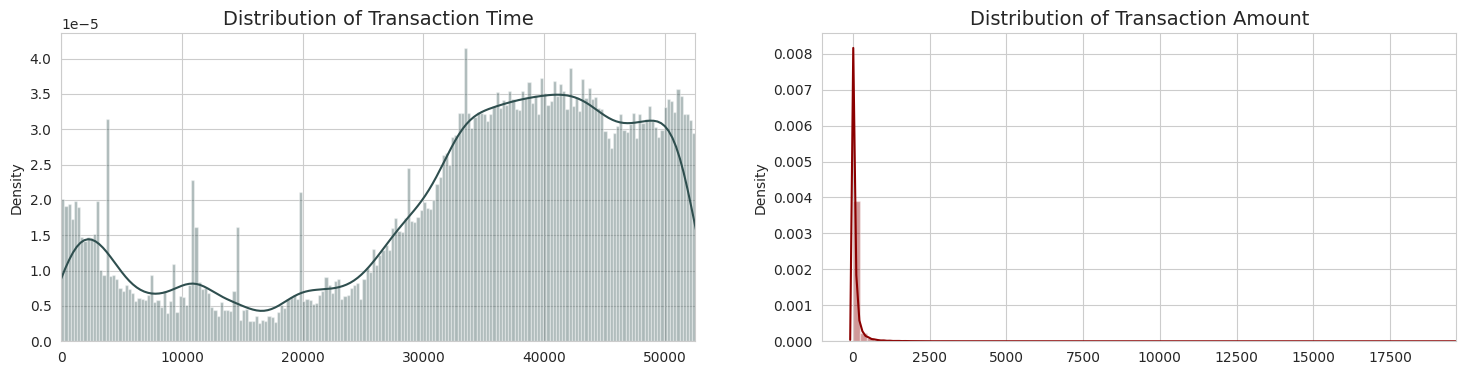

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(time_val, ax=ax[0], bins=200, color='darkslategray')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(time_val), max(time_val)])

sns.distplot(amount_val, ax=ax[1], bins=85, color='darkred')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(amount_val - 1000), max(amount_val)])

plt.show()

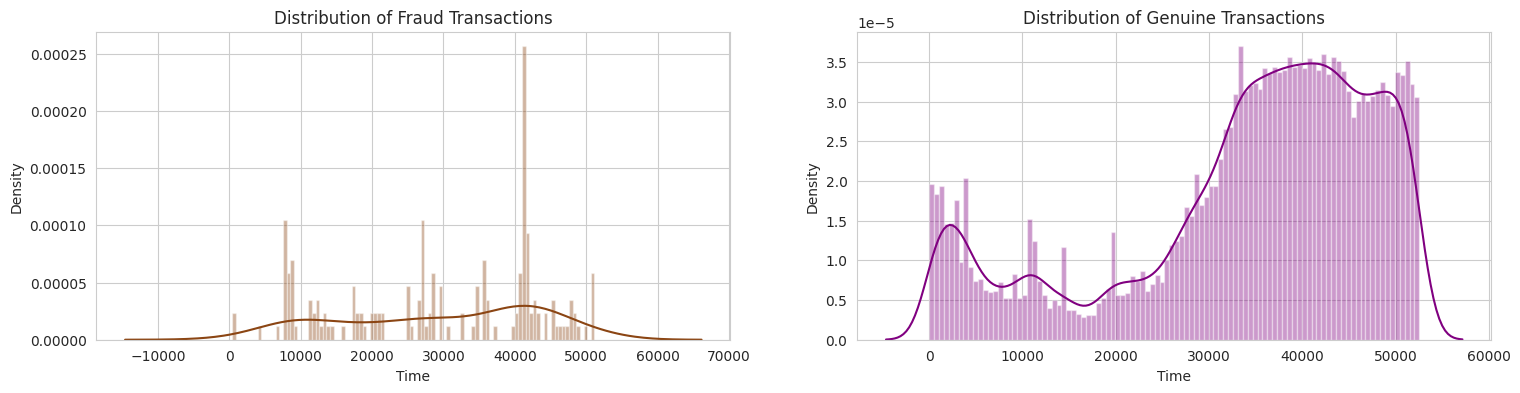

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(18,4))

sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='saddlebrown', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='purple', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

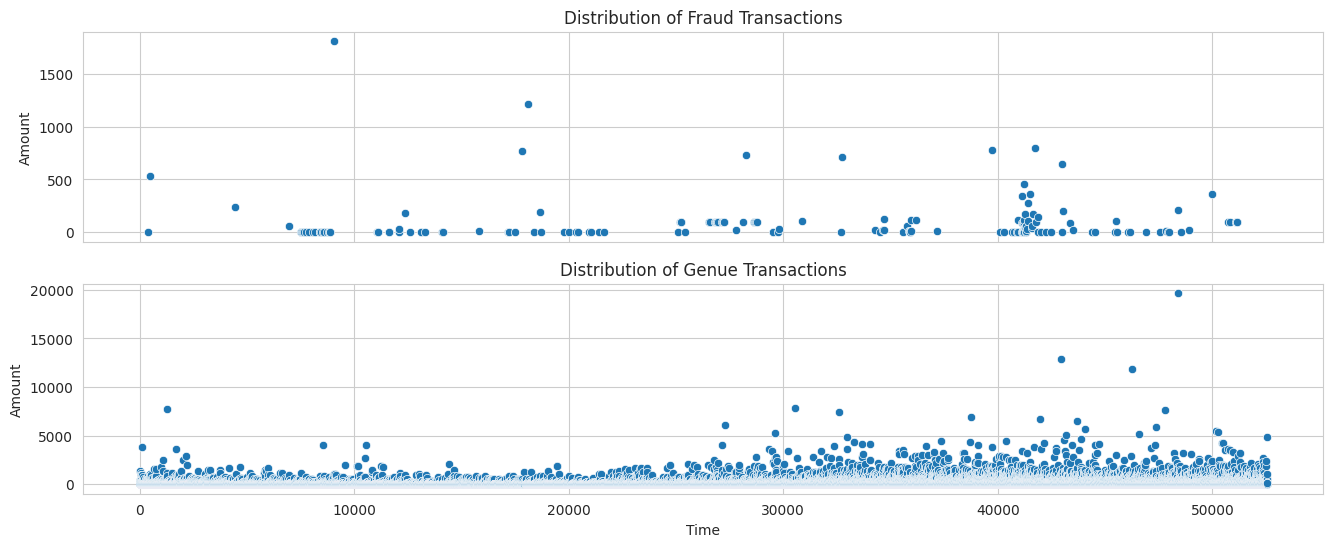

In [ ]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

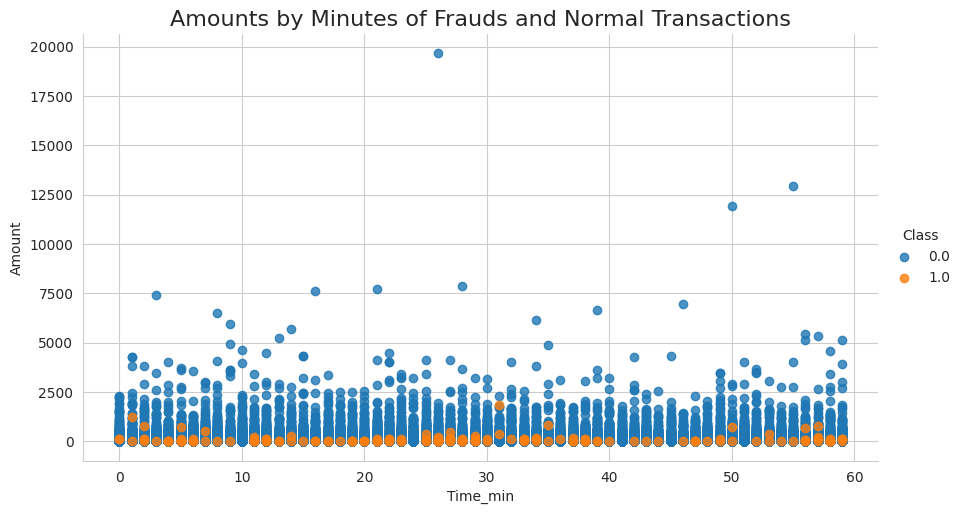

In [ ]:
sns.set_style('whitegrid')
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

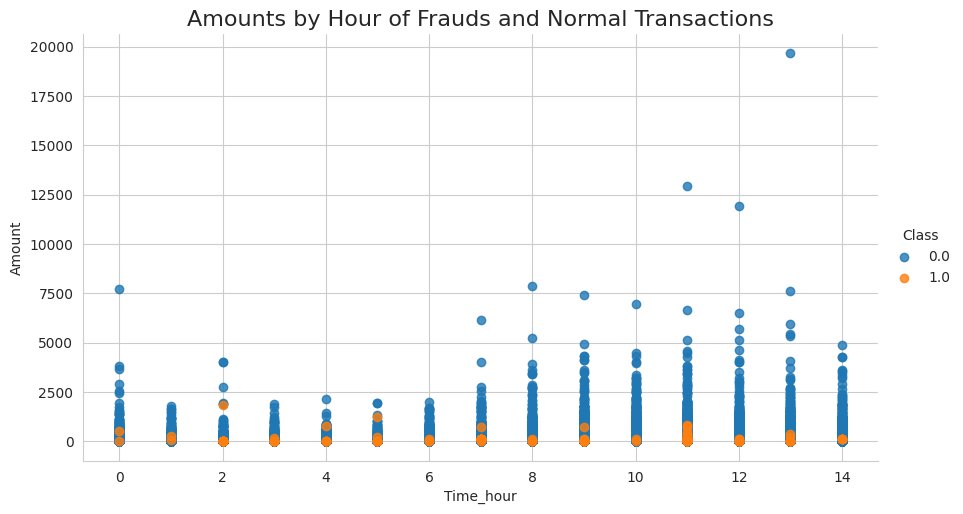

In [ ]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()
df.drop(['Time_hour', 'Time_min'], axis=1, inplace=True)

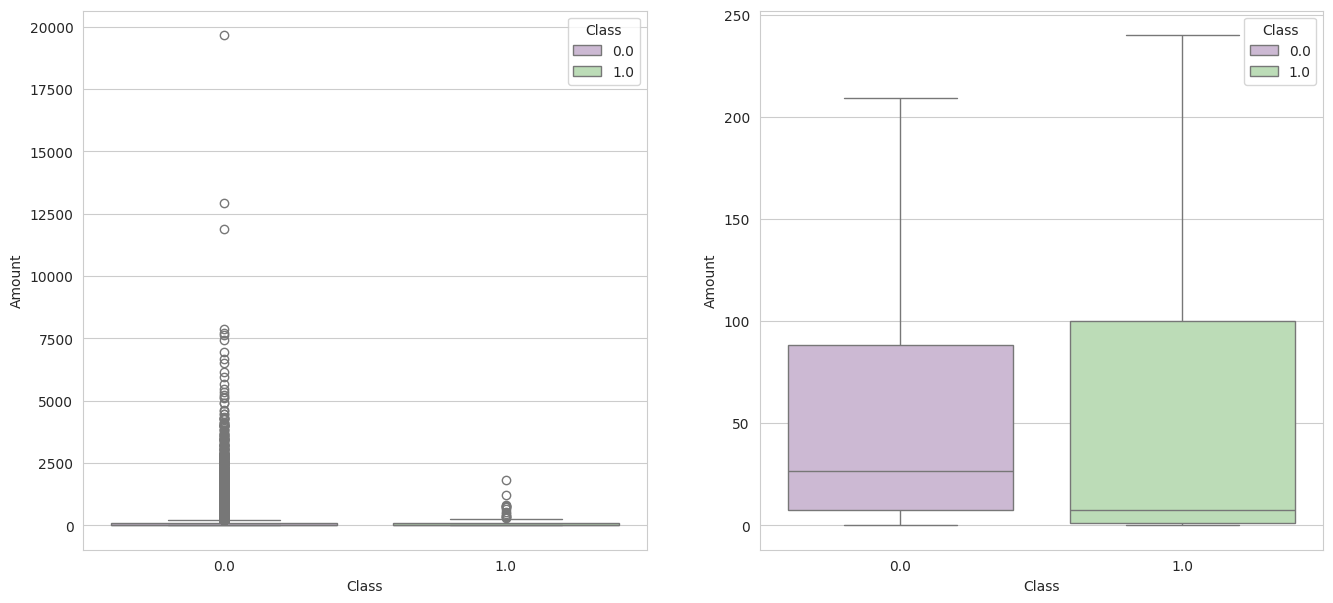

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,7))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [ ]:
cols_names = df.drop(['Class', 'Amount', 'Time'], axis=1)
idx = 0

In [ ]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

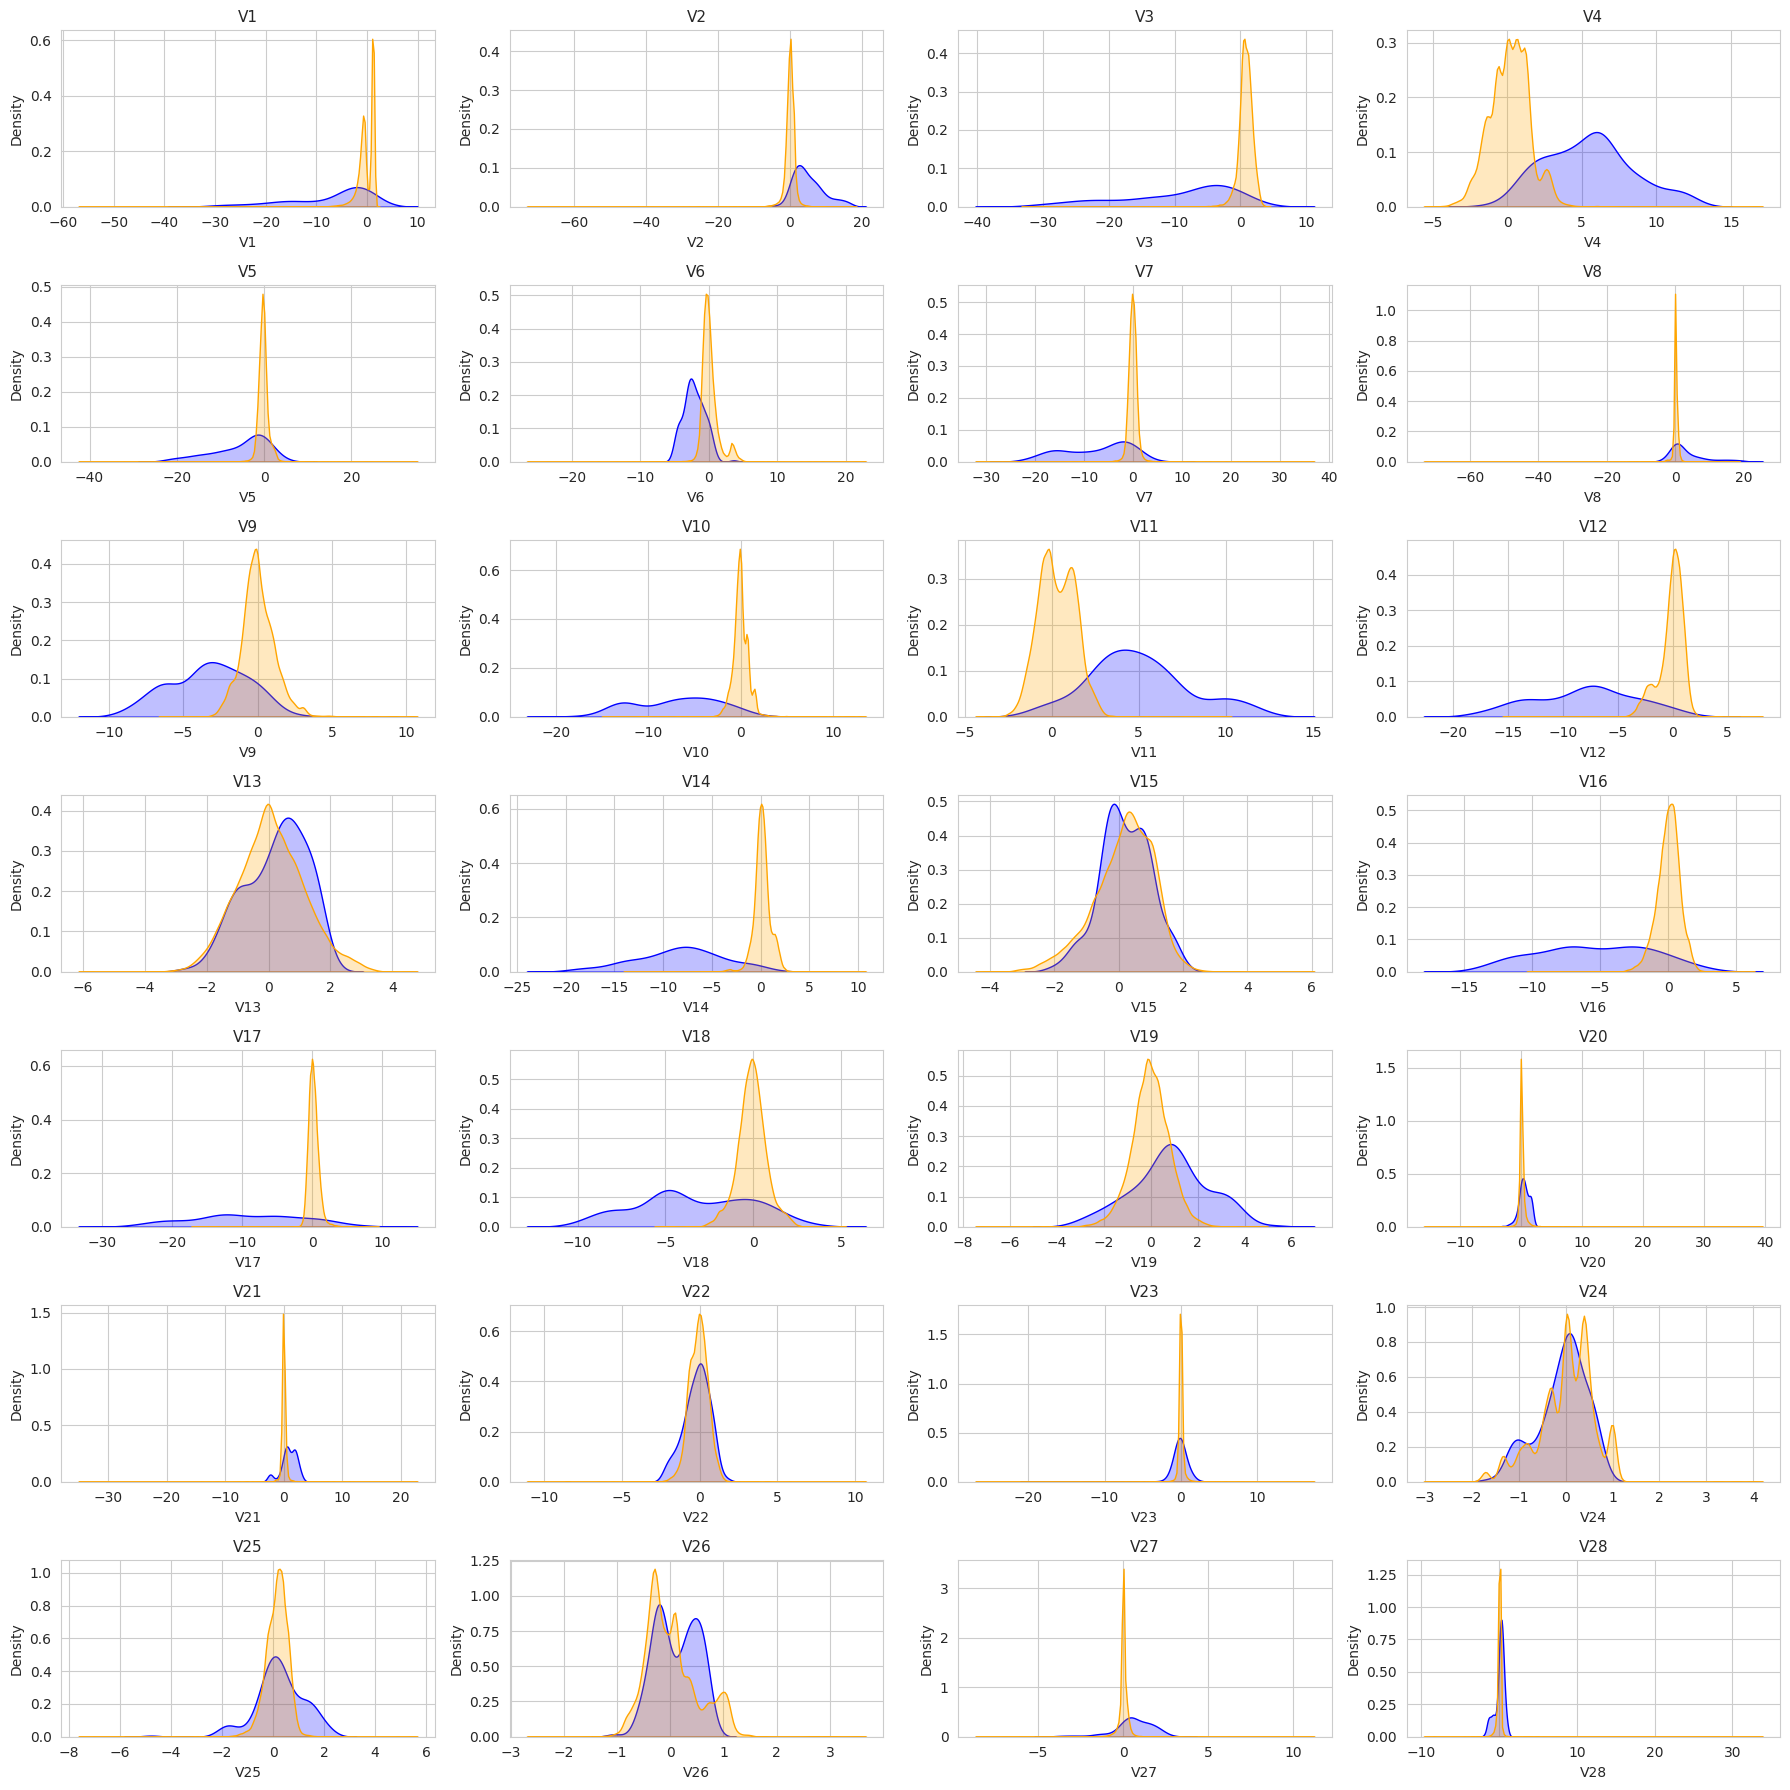

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

for col in cols_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(fraud[col], label="Normal", color='blue', shade=True)
    sns.kdeplot(normal[col], label="Fraud", color='orange', shade=True)
    plt.title(col, fontsize=11)
    plt.tight_layout()

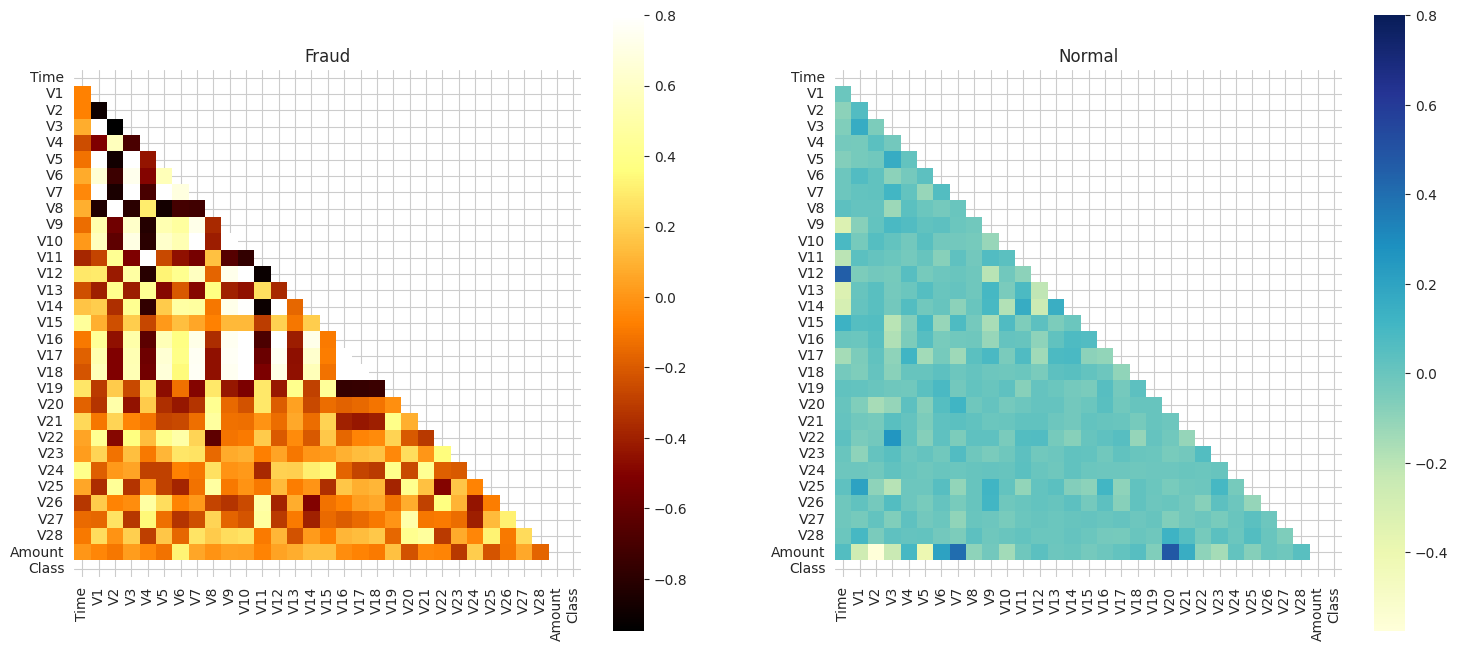

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((df.loc[df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()

In [ ]:
rob_scaler = RobustScaler()

In [ ]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
target = ['Class']

In [ ]:
feat_cols = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount']

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [ ]:
for train_index, test_index in sss.split(X, y):
    X_train_full, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_full, y_test = y.iloc[train_index], y.iloc[test_index]

ValueError: Input y contains NaN.

In [ ]:
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [ ]:
for train_idx, test_idx in sss2.split(X_train_full, y_train_full):
    X_train, X_valid = X_train_full.iloc[train_idx], X_train_full.iloc[test_idx]
    y_train, y_valid = y_train_full.iloc[train_idx], y_train_full.iloc[test_idx]

In [ ]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

In [ ]:
Model = GaussianNB()
Model.fit(X_train[feat_cols], y_train)
y_pred = Model.predict(X_test[feat_cols])

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:


fit_params = {
             "eval_metric" : 'binary',
             "eval_set" : [(X_test[feat_cols].values, y_test)],
             'eval_names': ['valid'],
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.001],
              'n_estimators' : [100],


              'min_child_weight': [1e-5],
              'subsample': sp_uniform(loc=0.2, scale=0.8),
              'max_depth': [-1],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.5),
              'reg_alpha': [ 10],
              'reg_lambda': [ 5]}

n_iter = 5

lgbm_clf = lgb.LGBMClassifier(random_state=42, silent=True, metric='None', n_jobs=0)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test,
    n_iter=n_iter,
    scoring='accuracy',
    cv=4, n_jobs=-1,
    refit=True,
    random_state=42)

grid_search.fit(X_train[feat_cols].values, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

opt_parameters =  grid_search.best_params_

clf_sw = lgb.LGBMClassifier(**lgbm_clf.get_params())
#Optimal parameter
clf_sw.set_params(**opt_parameters)

In [ ]:
lgbm_clf = lgb.LGBMClassifier(colsample_bytree=0.6247240713084175, max_depth=6, metric='None',
               min_child_samples=206, min_child_weight=1, n_estimators=1000,
               n_jobs=4, num_leaves=44, random_state=42, reg_alpha=0.1,
               reg_lambda=1, subsample=0.27997993265440235)

lgbm_clf.fit(X_train, y_train)
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
y_score = lgbm_clf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred.round()))

In [ ]:

clf = RandomForestClassifier(max_depth=5, min_samples_split=5,min_samples_leaf=4, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
Model=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,task_type='GPU')
Model.fit(X_train[feat_cols],y_train,eval_set=(X_test[feat_cols],y_test))

In [ ]:
y_pred=Model.predict(X_test[feat_cols])
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
tmp = pd.DataFrame({'Feature': feat_cols, 'Feature importance': Model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,6))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
params = {
        'learning_rate': [0.001],
        'max_depth': [3],
        'min_child_weight': [1],
        'subsample': [0.5],
        'colsample_bytree': [0.5],
        'n_estimators' : [100],
        'objective': ['binary:logistic'],
    }

In [ ]:
clf = xgb.XGBClassifier(random_state=42, tree_method='gpu_hist')

In [ ]:
model = GridSearchCV(estimator=clf, param_grid=params, cv=3, n_jobs=-1)

In [ ]:
model.fit(X_train[feat_cols].values, y_train)

In [ ]:
y_pred=model.predict(X_test[feat_cols].values)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
ads = ADASYN( n_neighbors=1, random_state=42)

In [ ]:
X_ads, y_ads = ads.fit_resample(X_train_full[feat_cols].values, y_train_full)

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [ ]:
for train_index, test_index in sss.split(X_ads, y_ads):
    X_train_ads, X_valid_ads = X_ads[train_index], X_ads[test_index]
    y_train_ads, y_valid_ads = y_ads[train_index], y_ads[test_index]

In [ ]:
Model = GaussianNB()

In [ ]:
Model.fit(X_train_ads, y_train_ads)

In [ ]:
y_pred = Model.predict(X_test[feat_cols])

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
params = {
        'learning_rate': [0.001],
        'max_depth': [3],
        'min_child_weight': [1],
        'subsample': [0.5],
        'colsample_bytree': [0.5],
        'n_estimators' : [100],
        'objective': ['binary:logistic']
    }

In [ ]:
clf = xgb.XGBClassifier(random_state=42, tree_method='gpu_hist')

In [ ]:
model = GridSearchCV(estimator=clf, param_grid=params, cv=3, n_jobs=-1)

In [ ]:
model.fit(X_train_ads, y_train_ads)

In [ ]:
y_pred=model.predict(X_test[feat_cols].values)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
clf = RandomForestClassifier(max_depth=3, min_samples_split=4,min_samples_leaf=4, random_state=42)

In [ ]:
clf.fit(X_train_ads, y_train_ads)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
fit_params = {"early_stopping_rounds" : 50,
             "eval_metric" : 'binary',
             "eval_set" : [(X_valid[feat_cols].values, y_valid)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

In [ ]:
param_test = {'learning_rate' : [0.001],
              'n_estimators' : [100],

              'min_child_weight': [1e-5],

              'max_depth': [ 3],

              'reg_alpha': [0],
              'reg_lambda': [0]}

In [ ]:
n_iter = 4

In [ ]:
lgbm_clf = lgb.LGBMClassifier(random_state=42, silent=True, metric='None')

In [ ]:
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test,
    scoring='accuracy',
    cv=4, n_jobs=-1)

In [ ]:
# Remove the 'early_stopping_rounds' argument from fit_params
fit_params.pop("early_stopping_rounds", None )
fit_params.pop("verbose", None )


grid_search.fit(X_train_ads, y_train_ads, **fit_params)

In [ ]:
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

In [ ]:
opt_parameters =  grid_search.best_params_

In [ ]:
clf_sw = lgb.LGBMClassifier(**lgbm_clf.get_params())

In [ ]:
clf_sw.set_params(**opt_parameters)

In [ ]:
lgbm_clf = lgb.LGBMClassifier(colsample_bytree=0.5339868613881635, learning_rate=0.05,
               max_depth=7, metric='None', min_child_weight=0.1,
               n_estimators=800, num_leaves=36, random_state=42, reg_alpha=0,
               reg_lambda=1, subsample=0.9901662910177844)

In [ ]:
lgbm_clf.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_clf.predict(X_test)

In [ ]:
y_score = lgbm_clf.predict_proba(X_test)[:,1]

In [ ]:
print(classification_report(y_test,y_pred.round()))

In [ ]:
Model=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42, task_type='GPU')

In [ ]:
Model.fit(X_train_ads,y_train_ads,eval_set=(X_valid_ads,y_valid_ads))

In [ ]:
y_pred=Model.predict(X_test[feat_cols].values)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)
X_valid_d = np.expand_dims(X_valid, -1)
y_valid_d = np.expand_dims(y_valid, -1)
y_train_d = np.expand_dims(y_train, -1)

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation='selu', kernel_initializer="lecun_normal", input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='selu', kernel_initializer="lecun_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='selu', kernel_initializer="lecun_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='selu', kernel_initializer="lecun_normal"))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
optimizer = keras.optimizers.legacy.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
m = model.fit(X_train_d, y_train,
              validation_data=(X_valid_d, y_valid_d),
              batch_size=500,
              epochs=20,
             )

In [ ]:
score = model.evaluate(X_test_d, y_test)
print(score)

In [ ]:
yhat_probs = model.predict(X_test_d, verbose=0)

In [ ]:
yhat_probs = np.argmax(yhat_probs,axis=1)

In [ ]:
precision = precision_score(y_test, yhat_probs)
print('\nPrecision: %f' % precision)
recall = recall_score(y_test, yhat_probs)
print('\nRecall: %f' % recall)

In [ ]:
f1 = f1_score(y_test, yhat_probs)
print('\nF1 score: %f' % f1)

In [ ]:
print("_______________________________________________")
auc = accuracy_score(y_test, yhat_probs)
print('\nAccuracy: %f' % auc)

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(m.history['accuracy'], label='auc_1')
plt.plot(m.history['val_accuracy'], label='val_auc_1')
plt.legend()

In [ ]:
X_train_d.shape

In [ ]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(20, input_shape=(X_train_d[0].shape), kernel_initializer='lecun_uniform', activation='relu', kernel_regularizer=l1(0.1), recurrent_regularizer=l1(0.01), bias_regularizer=None, activity_regularizer=None, dropout=0.2, recurrent_dropout=0.2))#, return_sequences=True))
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    return model

In [ ]:
model = create_lstm_model()

In [ ]:
model.summary()

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.0001)

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
m = model.fit(X_train_d, y_train,
              validation_data=(X_valid_d, y_valid_d),
              batch_size=64,
              epochs=30,
             )

In [ ]:
score = model.evaluate(X_test_d, y_test)
print(score)

In [ ]:
yhat_probs = model.predict(X_test_d, verbose=0)

In [ ]:
yhat_probs = np.argmax(yhat_probs,axis=1)

In [ ]:
precision = precision_score(y_test, yhat_probs)
print('\nPrecision: %f' % precision)
recall = recall_score(y_test, yhat_probs)
print('\nRecall: %f' % recall)

In [ ]:
print("_______________________________________________")
auc = accuracy_score(y_test, yhat_probs)
print('\nAccuracy: %f' % auc)

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(m.history['accuracy'], label='auc_1')
plt.plot(m.history['val_accuracy'], label='val_auc_1')
plt.legend()